In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Exploratory Data Analysis

In [2]:
attrition = pd.read_csv(r"C:\Users\vigne\OneDrive\Desktop\Employee_Attrition_Analysis\data\Emp_A.csv")

In [3]:
pd.options.display.max_columns = None
attrition.head() #Top 5 Records

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Data quality checks**

To look for any null values, we can just invoke the **isnull** call as follows

In [4]:
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [5]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
#change attrition column to int type
attrition['Attrition'] = attrition.Attrition.map({'Yes':1, 'No':0})
attrition['Attrition'] = attrition.Attrition.astype('int64')

In [7]:
categorical = attrition.select_dtypes(include = 'object')
print(categorical.columns)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [8]:
numerical = attrition.select_dtypes(include=['float64','int64'])

In [9]:
print((numerical.columns))

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


### Distribution of the dataset


<Axes: xlabel='Age', ylabel='Density'>

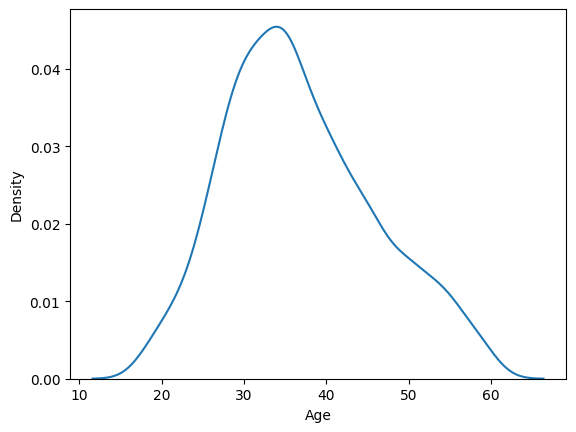

In [10]:
sns.kdeplot(attrition['Age'])

C:\Users\vigne\AppData\Local\Temp\ipykernel_8996\1175415379.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attrition['Age'])


<Axes: xlabel='Age', ylabel='Density'>

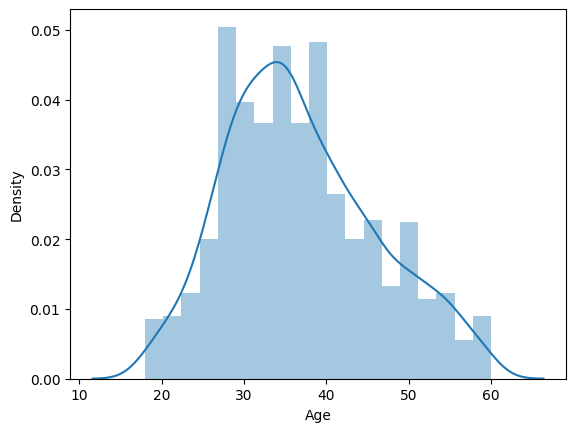

In [11]:
sns.distplot(attrition['Age'])

C:\Users\vigne\AppData\Local\Temp\ipykernel_8996\2595005866.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attrition['TotalWorkingYears'], ax = ax[0,0])
C:\Users\vigne\AppData\Local\Temp\ipykernel_8996\2595005866.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attrition['MonthlyIncome']

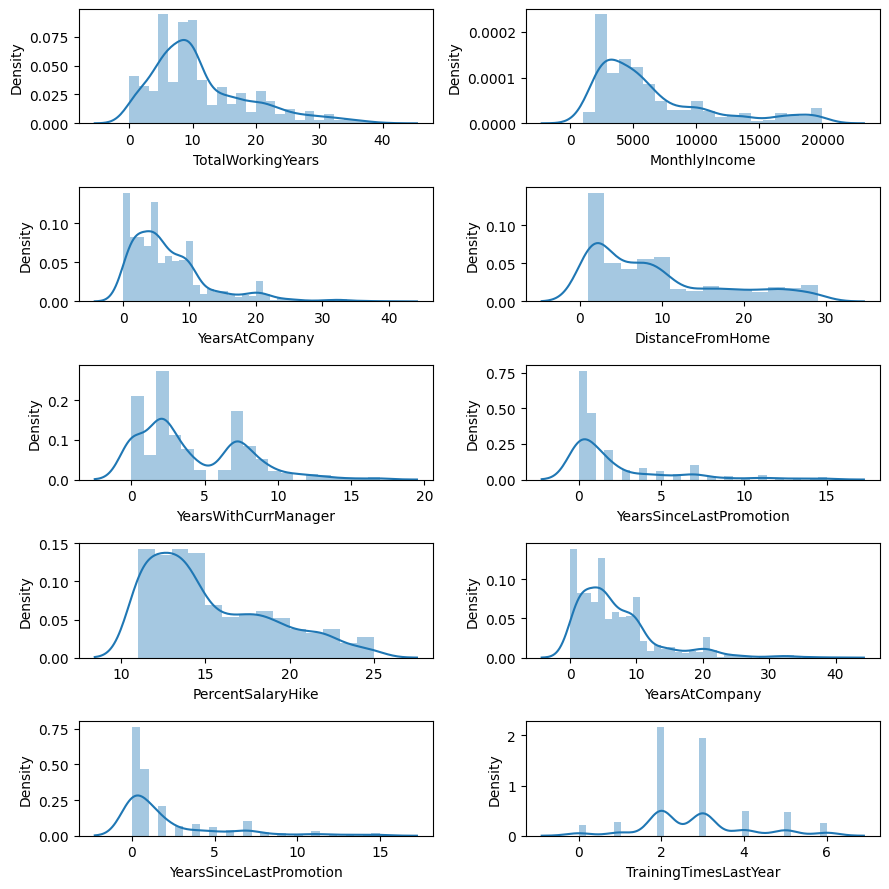

In [12]:
fig, ax = plt.subplots(5,2, figsize=(9,9))
sns.distplot(attrition['TotalWorkingYears'], ax = ax[0,0])
sns.distplot(attrition['MonthlyIncome'], ax = ax[0,1])
sns.distplot(attrition['YearsAtCompany'], ax = ax[1,0])
sns.distplot(attrition['DistanceFromHome'], ax = ax[1,1])
sns.distplot(attrition['YearsWithCurrManager'], ax = ax[2,0])
sns.distplot(attrition['YearsSinceLastPromotion'], ax = ax[2,1])
sns.distplot(attrition['PercentSalaryHike'], ax = ax[3,0])
sns.distplot(attrition['YearsAtCompany'], ax = ax[3,1])
sns.distplot(attrition['YearsSinceLastPromotion'], ax = ax[4,0])
sns.distplot(attrition['TrainingTimesLastYear'], ax = ax[4,1])
plt.tight_layout()
plt.show()

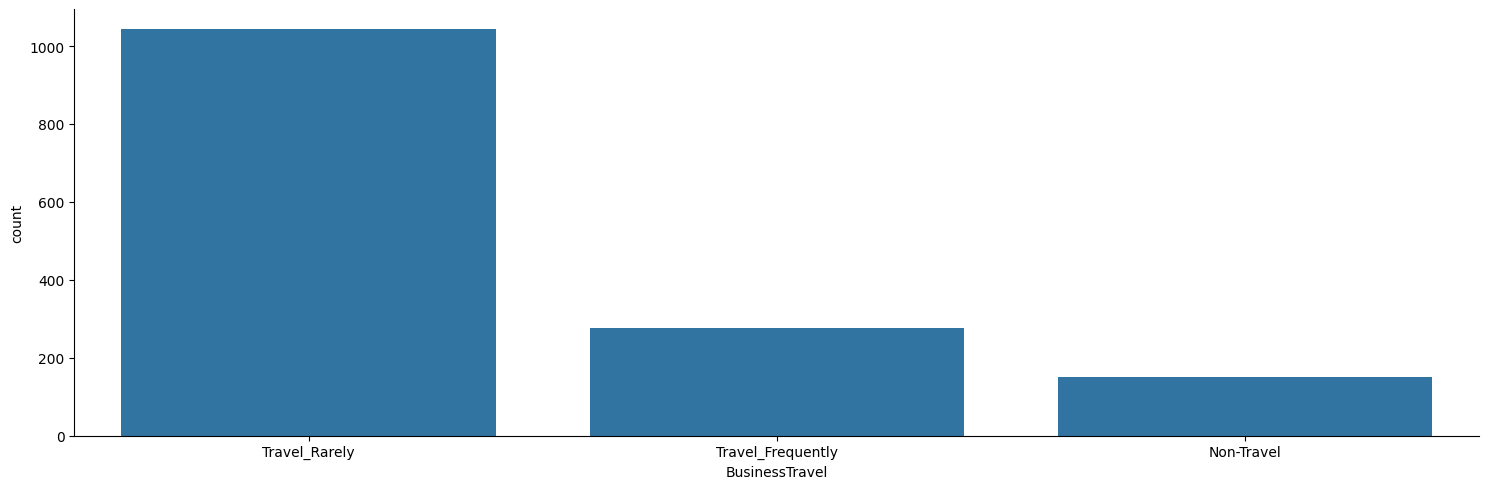

In [13]:
sns.catplot(data = attrition, kind = 'count', aspect = 3,x = 'BusinessTravel')

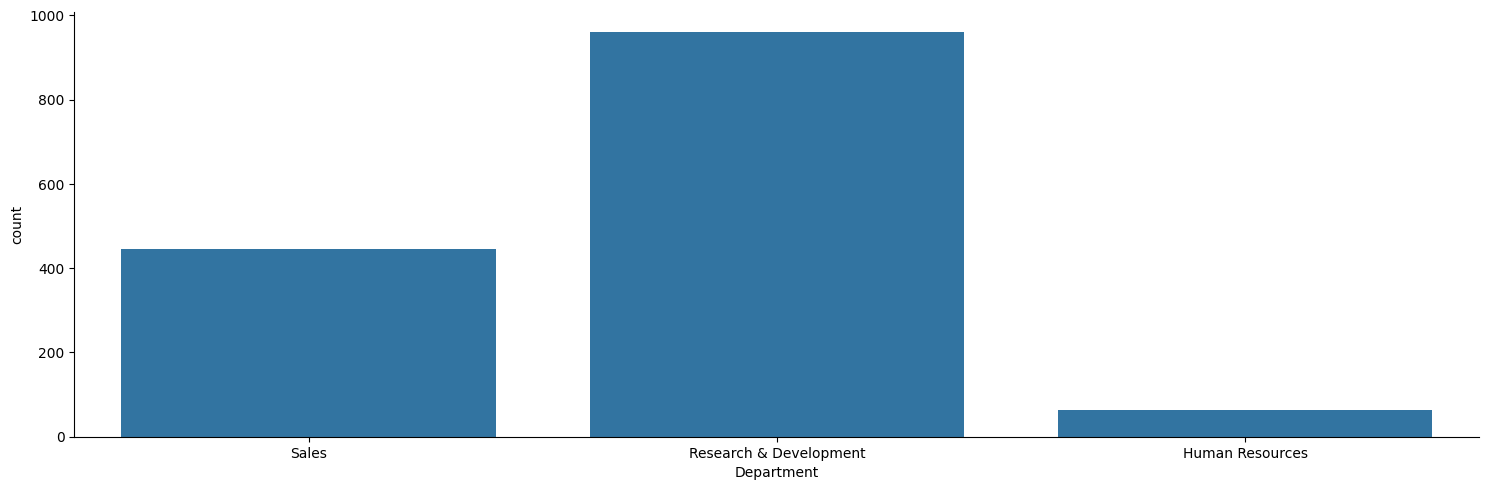

In [14]:
sns.catplot(data = attrition, kind = 'count', aspect = 3, x = 'Department')


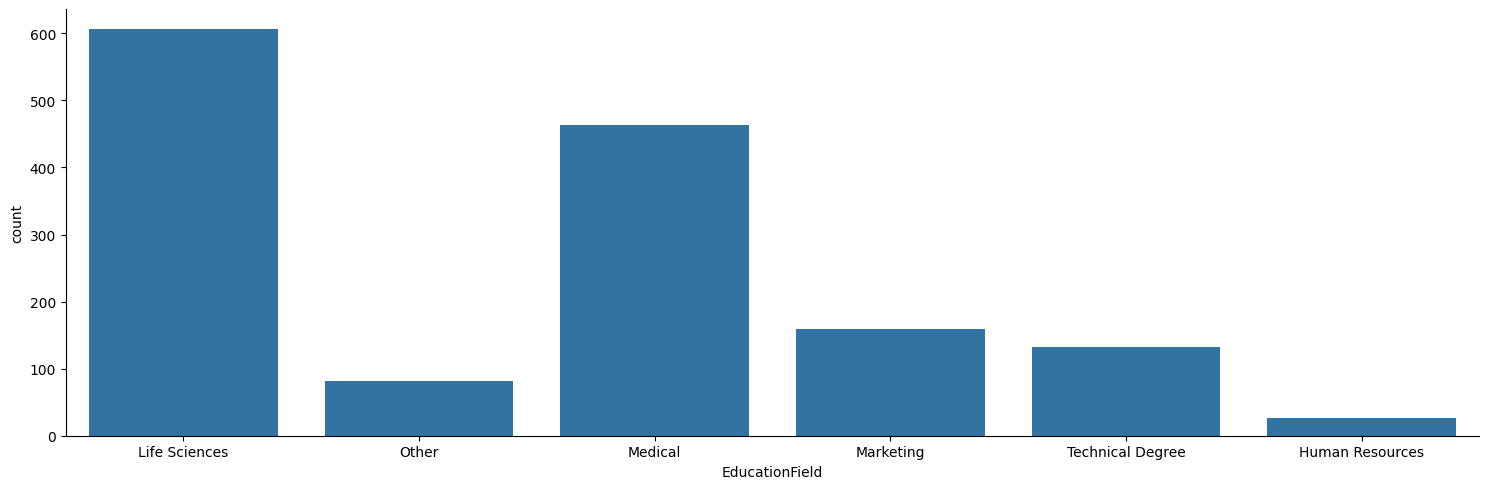

In [15]:
sns.catplot(data = attrition, kind = 'count', aspect = 3, x = 'EducationField')

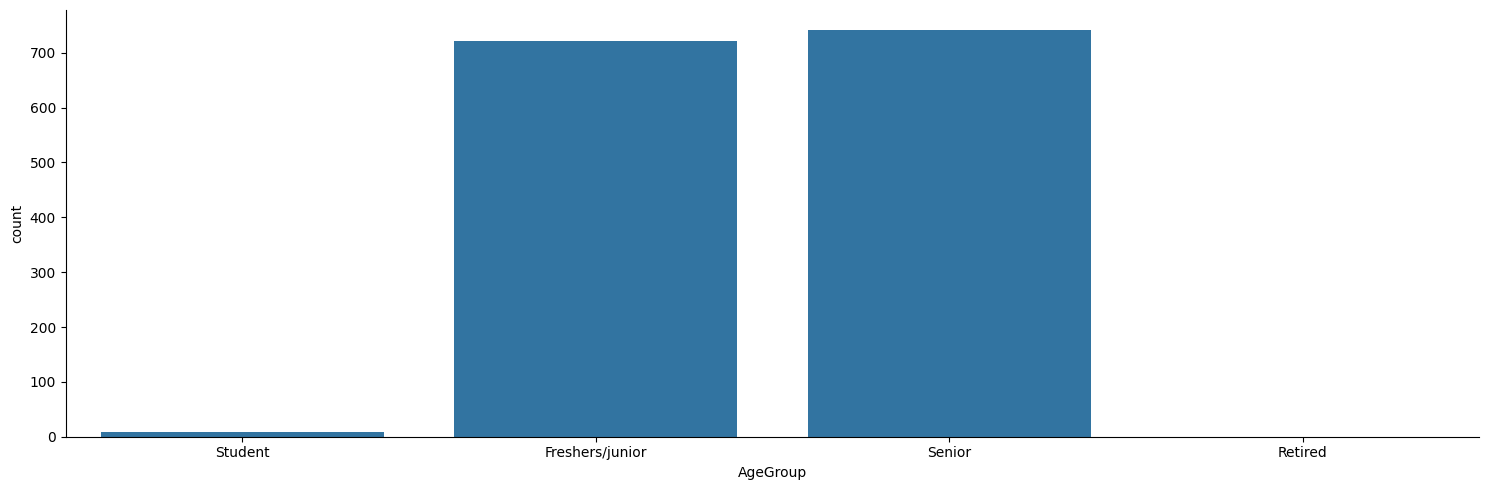

In [16]:
bins = [0, 18, 35, 60, np.inf]
labels = ['Student', 'Freshers/junior', 'Senior', 'Retired']
attrition['AgeGroup'] = pd.cut(attrition["Age"], bins, labels = labels)
sns.catplot(data = attrition, kind = 'count', aspect = 3,   x = 'AgeGroup')

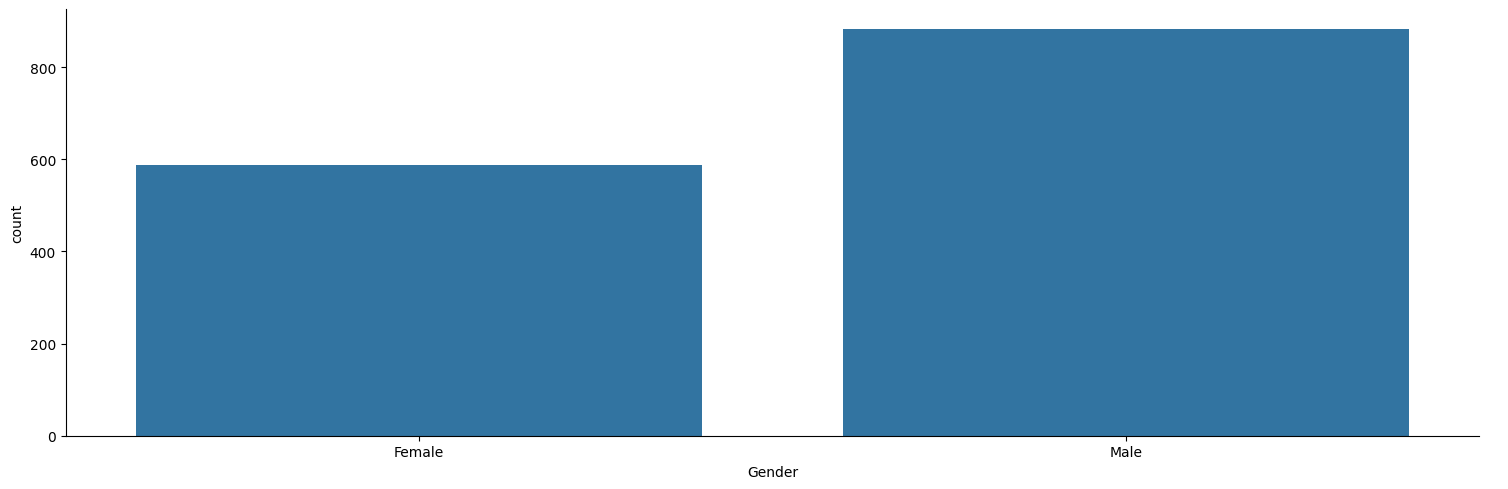

In [17]:
sns.catplot(data = attrition, kind = 'count', aspect = 3,   x = 'Gender')

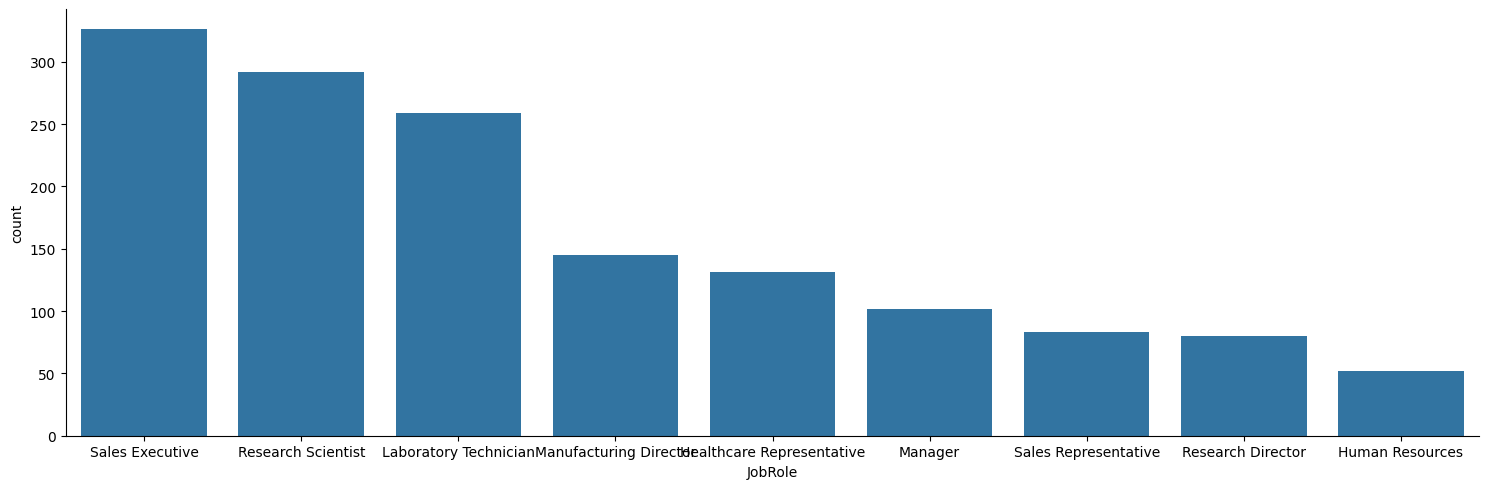

In [18]:
sns.catplot(data = attrition, kind = 'count', aspect = 3,   x = 'JobRole')

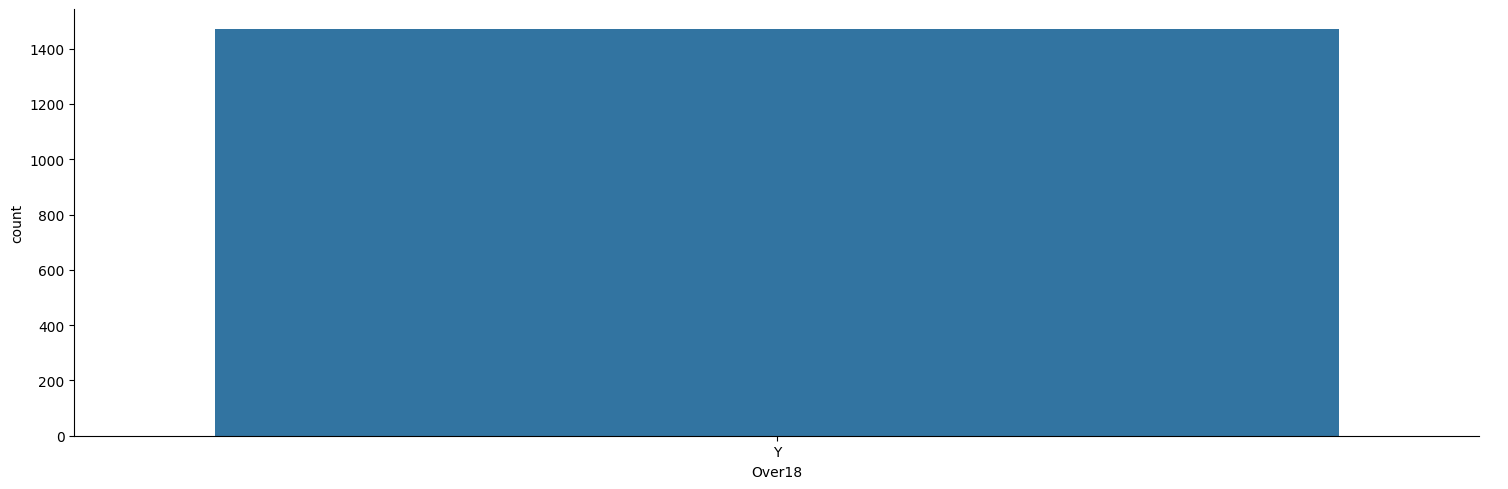

In [19]:
sns.catplot(data = attrition, kind = 'count', aspect = 3,   x = 'Over18')

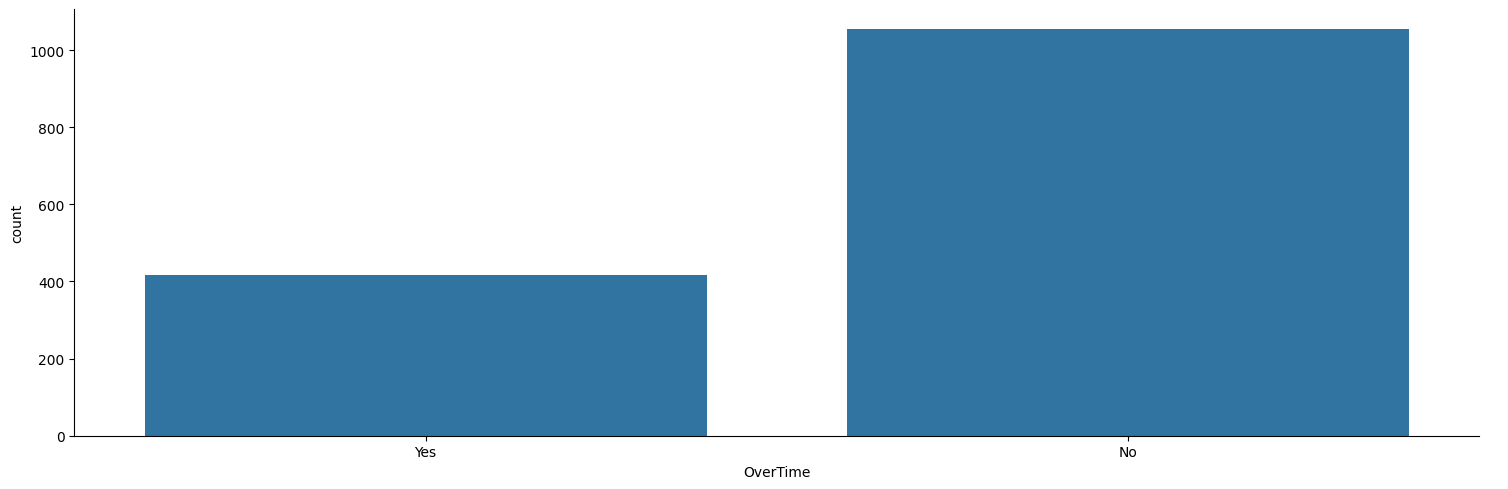

In [20]:
sns.catplot(data = attrition, kind = 'count', aspect = 3,   x = 'OverTime')

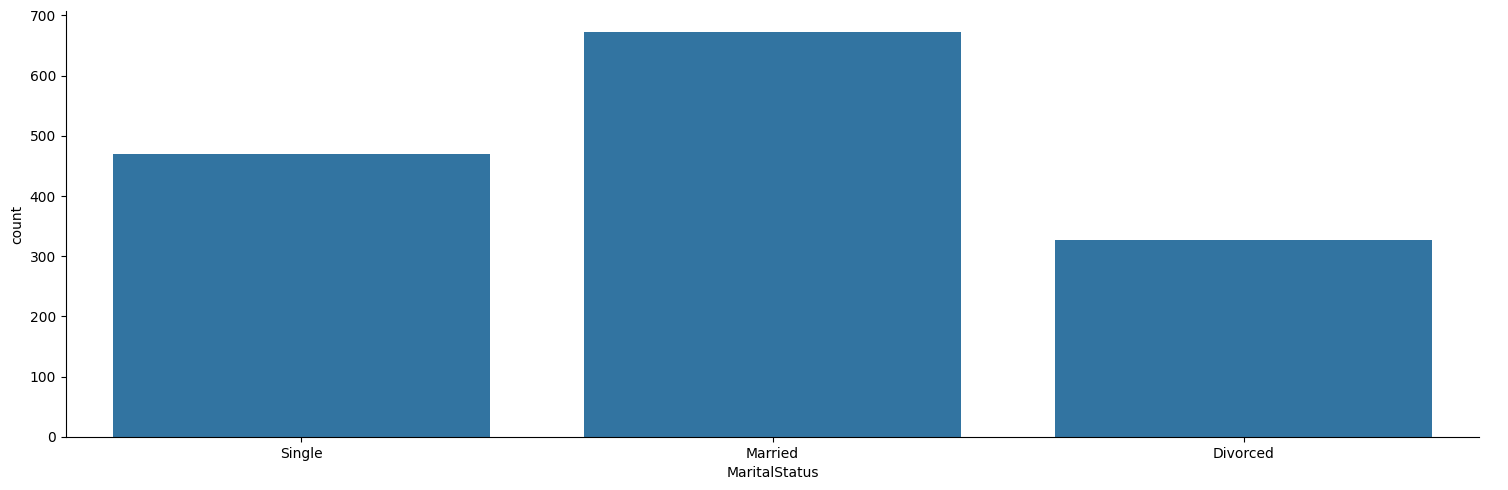

In [21]:
sns.catplot(data = attrition, kind = 'count', aspect = 3,   x = 'MaritalStatus')

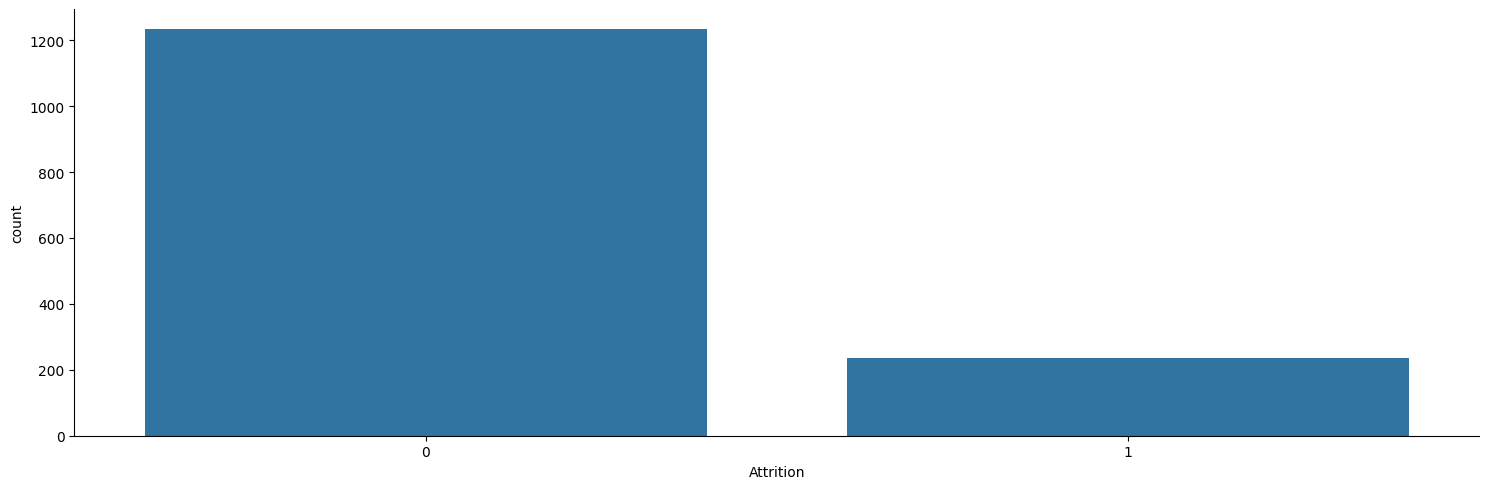

In [22]:
sns.catplot(data = attrition, kind = 'count', aspect = 3,   x = 'Attrition')

### Correlation of Features


<Axes: >

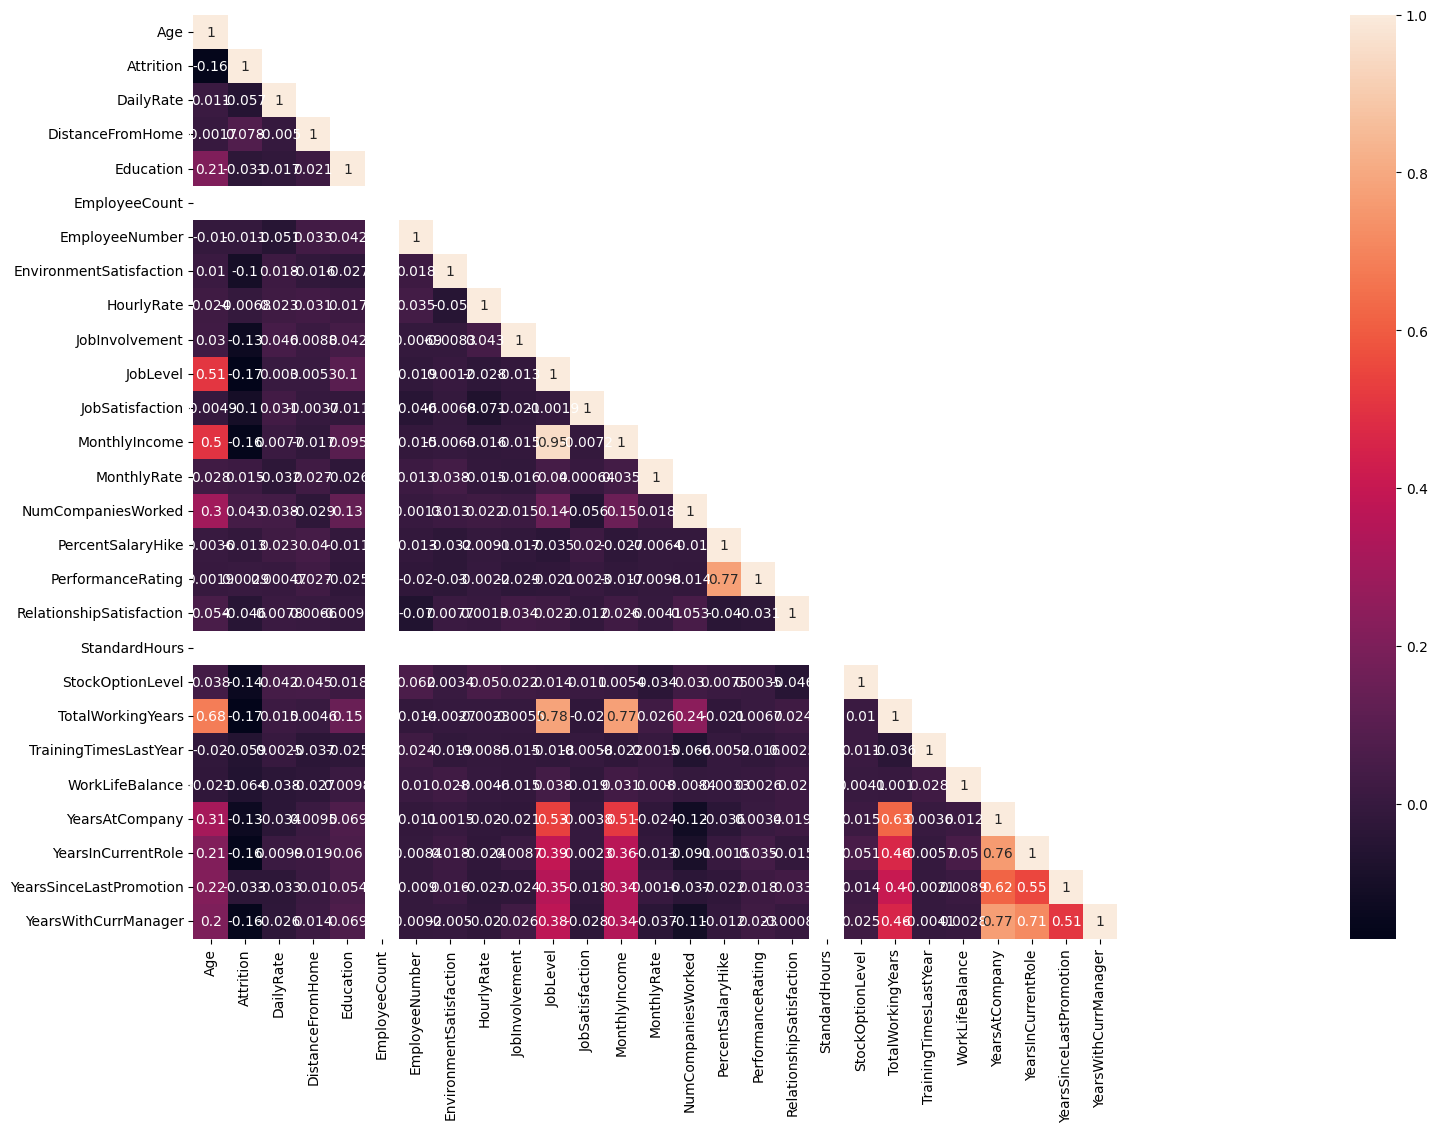

In [23]:
cor_mat = numerical.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(60,12)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

In [24]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeGroup'],
      dtype='object')

In [25]:
continious = ['Age',  'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany' ]

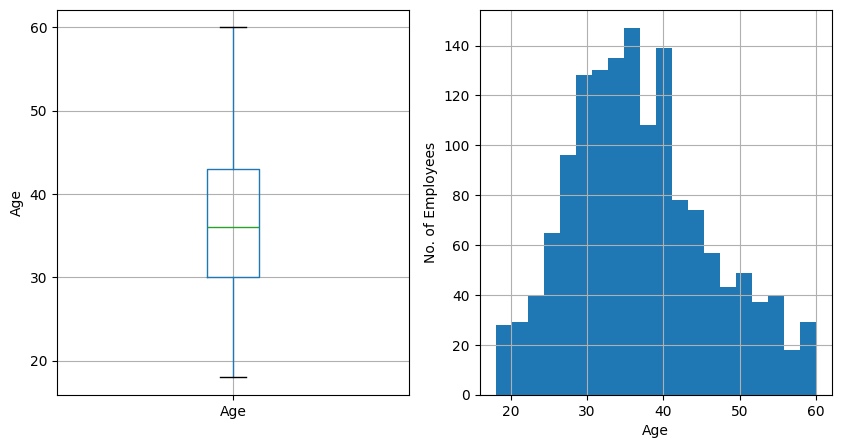

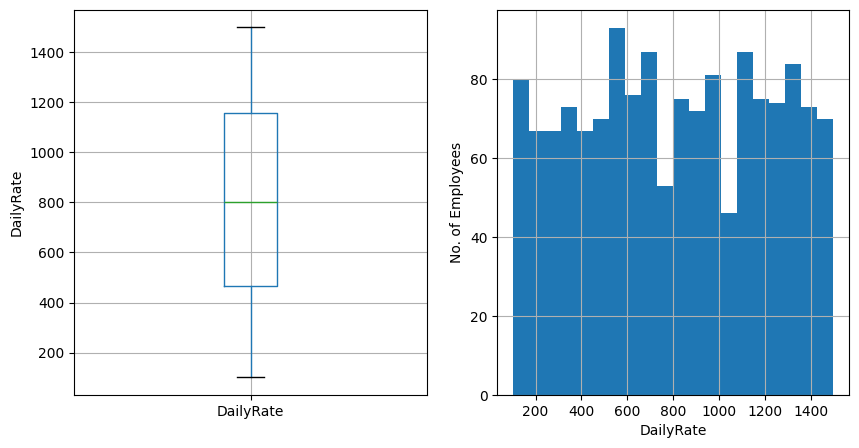

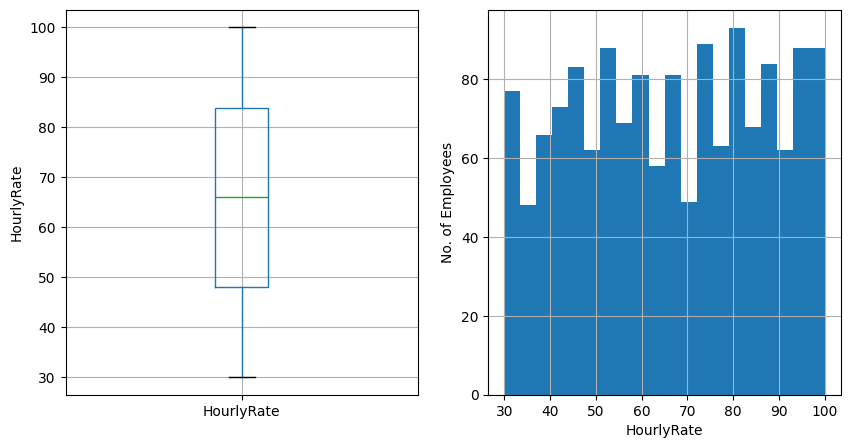

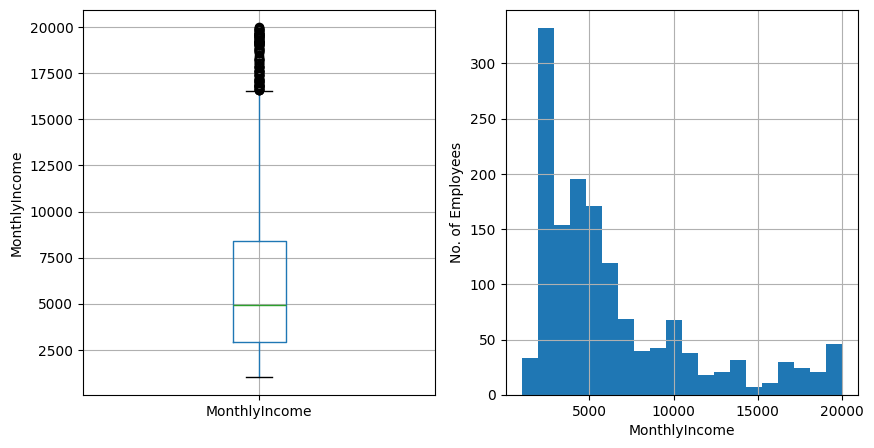

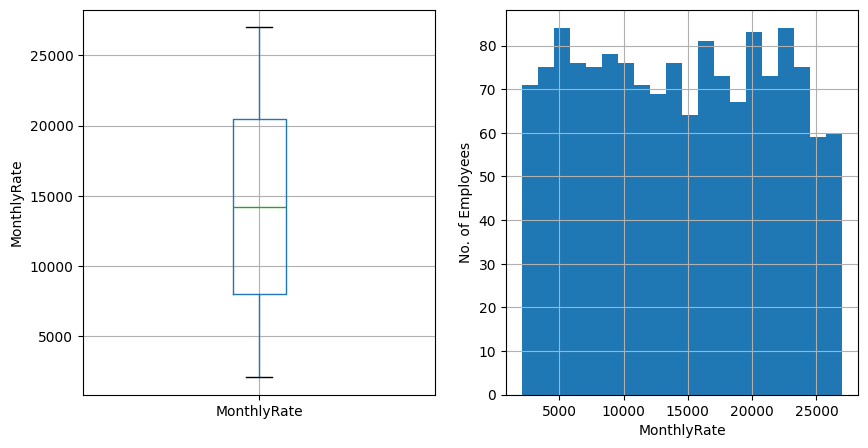

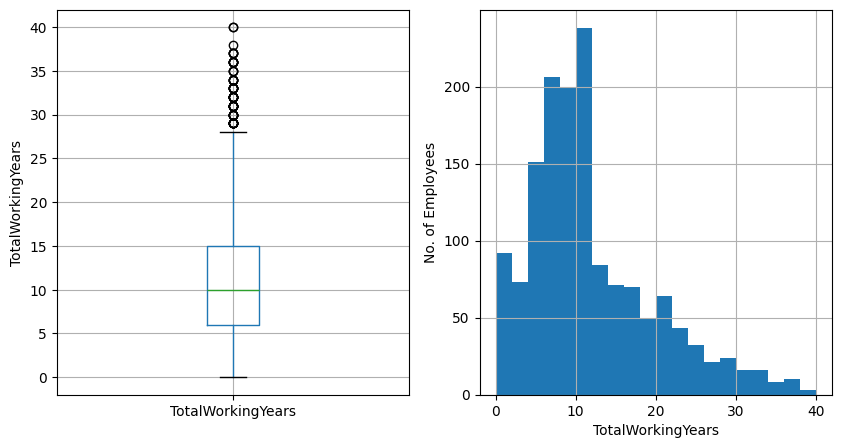

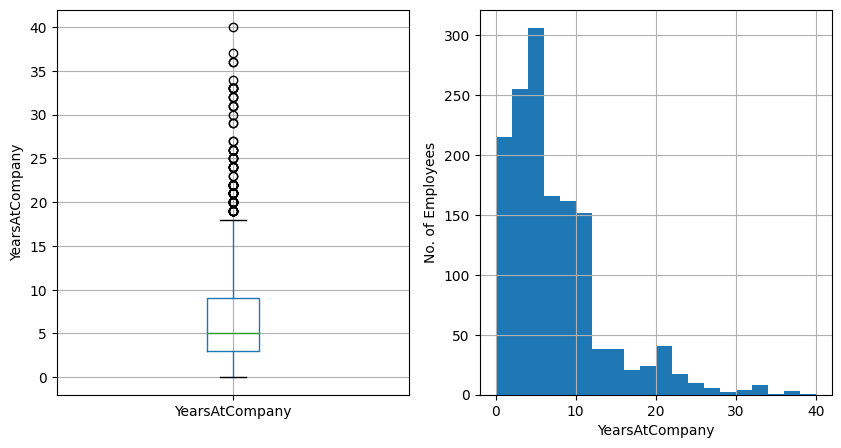

In [26]:
for var in continious:
    #boxplot
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    fig = attrition.boxplot(column = var)
    fig.set_ylabel(var)
    
    #histogram
    plt.subplot(1,2,2)
    fig = attrition[var].hist(bins = 20)
    fig.set_ylabel('No. of Employees')
    fig.set_xlabel(var)
    
    plt.show()
    

In [27]:
attrition[['Age',  'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany' ]].describe()

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,65.891156,6502.931293,14313.103401,11.279592,7.008163
std,9.135373,403.509100,20.329428,4707.956783,7117.786044,7.780782,6.126525
min,18.000000,102.000000,30.000000,1009.000000,2094.000000,0.000000,0.000000
25%,30.000000,465.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000
max,60.000000,1499.000000,100.000000,19999.000000,26999.000000,40.000000,40.000000


In [28]:
categorical.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [29]:
attrition_cat = pd.get_dummies(categorical)

In [30]:
attrition_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True
1,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False
2,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True
3,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True
4,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False


In [31]:
numerical.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [32]:
attrition_final = pd.concat([numerical,attrition_cat], axis=1)

In [33]:
# save the cleaned data to a new CSV file
attrition_final.to_csv('attrition_cleaned.csv', index=False)
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AgeGroup'],
      dtype='object')

In [34]:
attrition_final = attrition_final.drop('Attrition', axis = 1)

In [35]:
attrition_final

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,False,False,True,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False


In [36]:
target = attrition['Attrition']

Build Basline rf_models

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(attrition_final ,target, test_size = 0.2, random_state = 42)

In [39]:
x_train.shape

(1176, 55)

In [40]:
x_test.shape

(294, 55)

In [41]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
model_predictions = rf_model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, model_predictions))
print(classification_report(y_test, model_predictions))

Accuracy:  0.8707482993197279
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.60      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.74      0.53      0.53       294
weighted avg       0.84      0.87      0.82       294



Training Time (seconds): 0.2470567226409912
AUC-ROC Score: 0.7497737556561086


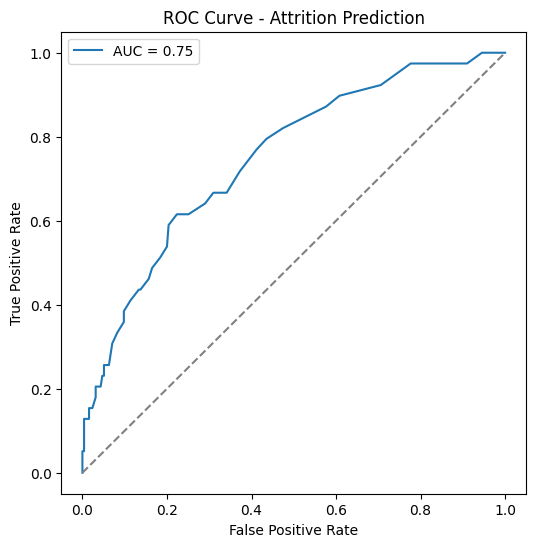

In [42]:

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import time

# Assuming X_train, X_test, y_train, y_test, and best_model are defined earlier for attrition prediction
start_time = time.time()
rf_model.fit(x_train, y_train)
train_time = time.time() - start_time

y_pred_proba = rf_model.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)

print("Training Time (seconds):", train_time)
print("AUC-ROC Score:", auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Attrition Prediction")
plt.legend()
plt.show()


In [ ]:


avg_recruitment_cost = 5000   
avg_training_cost = 3000      
avg_onboarding_cost = 2000    

total_cost_per_employee = avg_recruitment_cost + avg_training_cost + avg_onboarding_cost

# Calculate baseline attrition rate
baseline_attrition_rate = attrition["Attrition"].value_counts(normalize=True).get("Yes", 0)

# Predicted attrition rate (based on model predictions)
y_pred = rf_model.predict(x_test)
predicted_attrition_rate = sum(y_pred) / len(y_pred)

# Improvement in retention rate
improvement = baseline_attrition_rate - predicted_attrition_rate

# Estimated cost savings
num_employees = len(attrition_final)
estimated_savings = improvement * num_employees * total_cost_per_employee

print("Baseline Attrition Rate:", round(baseline_attrition_rate*100, 2), "%")
print("Predicted Attrition Rate:", round(predicted_attrition_rate*100, 2), "%")
print("Attrition Rate Reduction:", round(improvement*100, 2), "%")
print("Estimated Annual Cost Savings: $", round(estimated_savings, 2))


Baseline Attrition Rate: 0 %
Predicted Attrition Rate: 2.38 %
Attrition Rate Reduction: -2.38 %
Estimated Annual Cost Savings: $ -350000.0


Training Time (sec): 0.3948523998260498

Classification Report:
               precision    recall  f1-score   support

           3       0.84      0.98      0.91       249
           4       0.00      0.00      0.00        45

    accuracy                           0.83       294
   macro avg       0.42      0.49      0.45       294
weighted avg       0.72      0.83      0.77       294


Confusion Matrix:
 [[244   5]
 [ 45   0]]


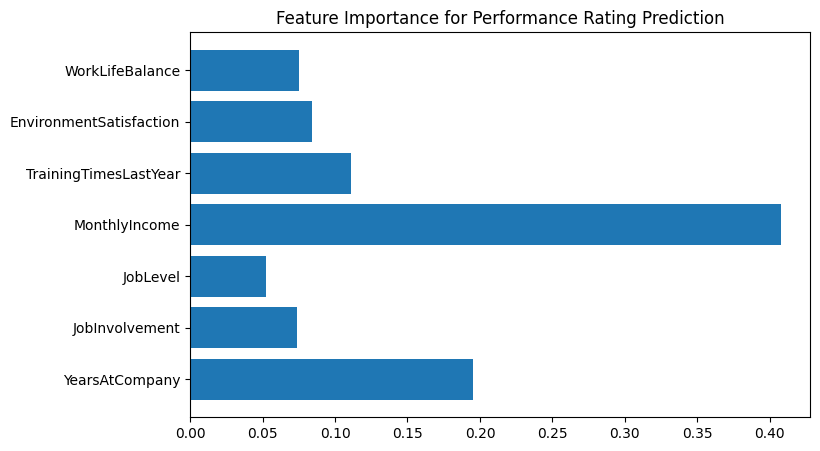

In [ ]:
# performance Rting prediction

import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Features for Performance Rating prediction
features = ["YearsAtCompany", "JobInvolvement", "JobLevel",
            "MonthlyIncome", "TrainingTimesLastYear",
            "EnvironmentSatisfaction", "WorkLifeBalance"]

X_perf = attrition_final[features]
y_perf = attrition_final["PerformanceRating"]

# Train-test split
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(
    X_perf, y_perf, test_size=0.2, random_state=42, stratify=y_perf
)

# Train model and measure time
start_time = time.time()
rf_model_perf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_perf.fit(X_train_perf, y_train_perf)
train_time_perf = time.time() - start_time

# Predictions
y_pred_perf = rf_model_perf.predict(X_test_perf)

# Evaluation
print("Training Time (sec):", train_time_perf)
print("\nClassification Report:\n", classification_report(y_test_perf, y_pred_perf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_perf, y_pred_perf))

# Feature importance
importances = rf_model_perf.feature_importances_
plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.title("Feature Importance for Performance Rating Prediction")
plt.show()


In [45]:
# save both prediction and paerformance model
import joblib

joblib.dump(rf_model, 'attrition_model.pkl')
joblib.dump(rf_model_perf, 'performance_model.pkl')

['performance_model.pkl']